<a href="https://colab.research.google.com/github/adrianajikal/analise_dados_airbnb_Vancouver/blob/main/Analisando_os_Dados_do_Airbnb_(Vancouver).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="100%" src ="https://assets.simpleviewinc.com/simpleview/image/upload/c_fill,h_768,q_50,w_1920/v1/clients/vancouverbc/amazing_vancouver_video_still_a156a786-54dd-45ea-941c-41d6a04e2212.jpg">

---

# Análise dos Dados do Airbnb - *Vancouver*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Vancouver, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# importar o arquivo listings.csv para um DataFrame
df= pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2022-12-11/visualisations/listings.csv")
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_name` - número de id do proprietario (anfitrião) da propriedade
* `neighbourhood_group` - esta coluna não conta nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price`- preço para alugar o imóvel
* `minimum_nights` - quantidade minima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review`- data do último  review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `license` - número da licensa da propriedade com o airbnb



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [20]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28201,-123.12669,Entire home/apt,150,3,438,2022-10-30,2.88,1,82,7,18-611603
1,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,96,2022-11-06,0.68,1,165,5,NaN
2,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.23,1,0,0,21-156500
3,14424,Spacious one-bedroom in sought-after Strathcona,56709,Samantha Jo,NaN,Downtown Eastside,49.27921,-123.08835,Entire home/apt,108,30,263,2022-10-20,1.68,3,81,5,19-162091
4,16254,Close to PNE/Hastings Park Garden level suite,63238,Jason,NaN,Hastings-Sunrise,49.27721,-123.04086,Entire home/apt,350,3,7,2022-07-30,0.13,1,101,2,19-162421


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [53]:
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

display(df.dtypes)

Entradas:	5676
Variáveis:	18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**


A qualidade de um *dataset* está diretamente relacionada à quantidade de 
valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas:

In [31]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending =False)*100

neighbourhood_group               100.000000
license                            28.523608
reviews_per_month                  17.230444
last_review                        17.230444
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

* A colunas 'neighbourhood_group' possui 100% de dados ausentes.
* A coluna 'license' possui aproximadamente 28% de dados ausentes
* As colunas 'reviews_per_month' e 'last_review' possuem aproximadamente 17% de dados ausentes.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Vamos plotar o histograma das variáveis numéricas relevantes exceto:
- *'id' e 'host_id' pois esses são numeros (códigos) de identificação;

- *'neighbourhood_group'* pois essa variável possui todos os dados ausentes.

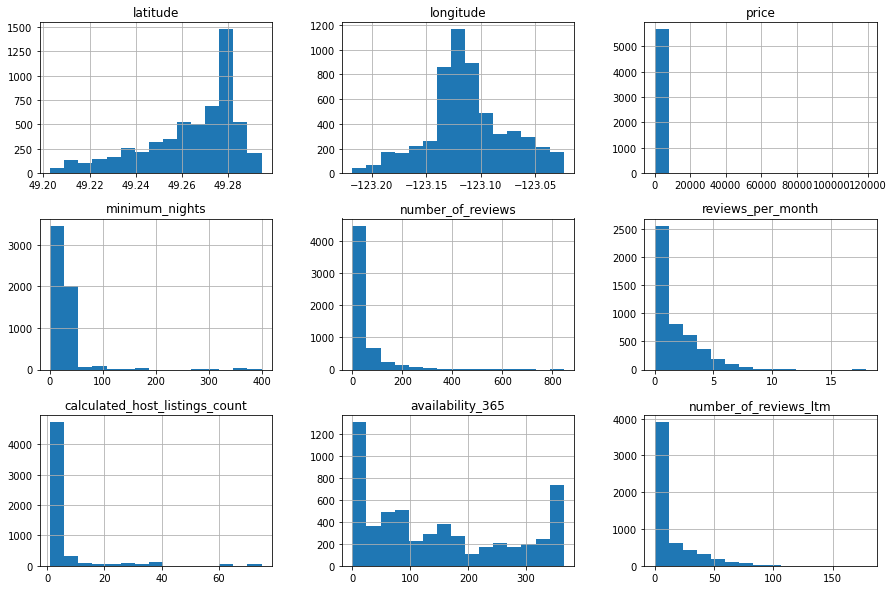

In [52]:
numdf = df.columns.drop(['id', 'host_id', 'neighbourhood_group'])
df[numdf].hist(bins=15, figsize=(15,10));

Observamos indícios de presença de **outliers** atraves da distribuição das barras. Vamos confirmar esses outliers através de um resumo estatístico:

In [43]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5676.000000,5676.000000,5676.000000,4698.000000,5676.000000,5676.000000,5676.000000
mean,265.842671,17.220754,38.424771,1.711713,5.668428,146.456660,12.567125
std,2640.961017,32.292393,67.402732,1.794643,12.692153,126.752859,19.576284
min,20.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,100.000000,2.000000,2.000000,0.320000,1.000000,32.000000,0.000000
50%,141.000000,3.000000,11.000000,1.000000,1.000000,114.000000,3.000000
75%,205.000000,30.000000,46.000000,2.680000,3.000000,259.000000,18.000000
max,119149.000000,399.000000,846.000000,17.930000,75.000000,365.000000,178.000000


Esse resumo estatístico nos confirma algumas hipóteses de outliars:
* A variável `price`possui 75% do valor abaixo de 205.00 enquanto o máximo é 119149.00;
* O `minimum_nights` (mínimo de noites) está acima de 365 dias no ano, tendo valores até de 399.
* `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count` e `number_of_reviews_ltm` possuem valores muito discrepantes entre a média de 75% do total com o valor máximo. 

### **Q4. Qual a média dos preços de aluguel?**

In [51]:
print('A média dos preços de aluguel é: C$ {}'.format(df['price'].mean()))

A média dos preços de aluguel é: C$ 265.8426708949965


### **Q4. Qual a correlação existente entre as variáveis**

In [56]:
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.000136,-0.010896,-0.010644,-0.010756,-0.007677,-0.017055
minimum_nights,-0.000136,1.000000,-0.153986,-0.287041,0.105165,0.124319,-0.256747
number_of_reviews,-0.010896,-0.153986,1.000000,0.481041,-0.154689,-0.063215,0.647514
reviews_per_month,-0.010644,-0.287041,0.481041,1.000000,-0.125039,0.064770,0.799997
calculated_host_listings_count,-0.010756,0.105165,-0.154689,-0.125039,1.000000,0.078671,-0.144669
availability_365,-0.007677,0.124319,-0.063215,0.064770,0.078671,1.000000,-0.019480
number_of_reviews_ltm,-0.017055,-0.256747,0.647514,0.799997,-0.144669,-0.019480,1.000000


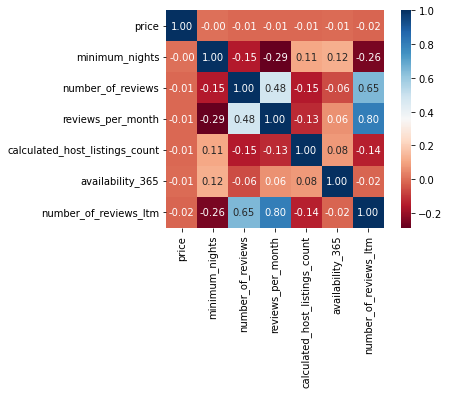

In [57]:
sns.heatmap(corr, cmap ='RdBu', fmt='.2f', square= True, linecolor= 'white', annot=True);

Observamos uma correlação entre os dados das colunas relacionadas ao "review" como esperado, porém nenhuma correlaçao relevante com outras variáveis.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

#### Tipos de hospedagens
* **Entire home/apt**: local inteiro. Não há convivencia com o anfitrião ou outro hóspede.
* **Private room**: quarto inteiro. Local é compartilhado com outro(s).
* **Hotel room**: quarto em rede hoteleira.
* **Shared room**: quarto compartilhado com outro(s).

In [59]:
df.room_type.value_counts()

Entire home/apt    4688
Private room        959
Shared room          24
Hotel room            5
Name: room_type, dtype: int64

In [63]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts()/ df.shape[0] * 100

Entire home/apt    82.593376
Private room       16.895701
Shared room         0.422833
Hotel room          0.088090
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

#### Mapa dos Bairros de Vancouver:
  <img width= '50%' src="https://pt.vancouvermap360.com/img/1200/vancouver-neighborhood-map.jpg">

In [65]:
# média de preços por bairro:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
West Point Grey             742.857143
Kensington-Cedar Cottage    686.453258
Grandview-Woodland          563.719828
Arbutus Ridge               365.189189
Downtown                    286.029132
Kitsilano                   227.477855
Oakridge                    203.430380
Fairview                    201.829932
Shaughnessy                 194.342857
West End                    191.472837
Dunbar Southlands           189.322581
Downtown Eastside           174.332226
Riley Park                  172.761905
Mount Pleasant              169.271429
Kerrisdale                  168.931507
South Cambie                160.477612
Strathcona                  157.875000
Marpole                     156.251748
Sunset                      155.289256
Renfrew-Collingwood         142.795455
Victoria-Fraserview         141.085106
Killarney                   134.325301
Hastings-Sunrise            133.363636
Name: price, dtype: float64

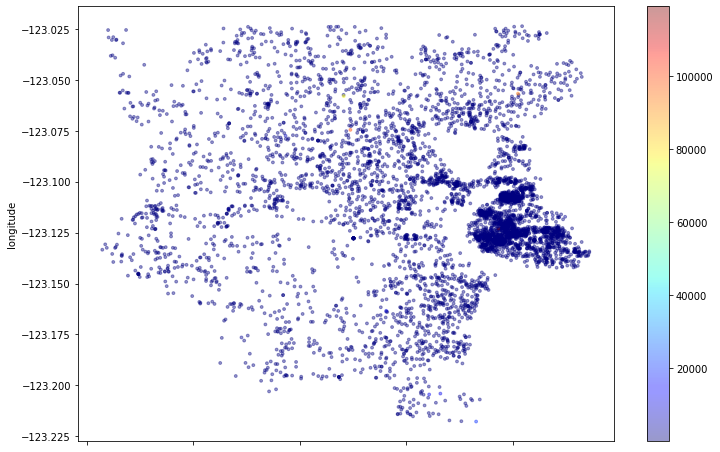

In [67]:
# plotar os imóveis pela latitude-longitude
df.plot(kind = 'scatter', x= 'latitude', y= 'longitude', alpha= 0.4, c = df['price'], s=8, cmap=plt.get_cmap('jet'), figsize = (12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [72]:
print('A média do mínimo de noites para aluguel é: {}'.format(df['minimum_nights'].mean()))

A média do minimo de noites para aluguel é: 17.220754052149402


In [73]:
df['minimum_nights'].describe()

count    5676.000000
mean       17.220754
std        32.292393
min         1.000000
25%         2.000000
50%         3.000000
75%        30.000000
max       399.000000
Name: minimum_nights, dtype: float64

## Conclusões


Foi feito uma análise superficial na base de dados do Airbnb na cidade de Vancouver, e foi possível detectar outliers em algumas variáves. Conseguimos extrair informações como a média de preços dos alugueis e das regiões, tipos de hospedagens mais alugadas e média do mínimo de noites para aluguel, porém recomenda-se fazer a limpeza dos dados para uma análise mais acurada. 
Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.